# Análise de Dados - IDHM Educação

## Introdução

Este notebook contém a análise exploratória, criação de modelos de classificação, e testes de hipótese relacionados aos dados do IDHM Educação.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Carregar os dados
file_path = 'C:/Users/55819/OneDrive/Documentos/idh_tratado.xlsx'
data = pd.read_excel(file_path)

# Ajustar o rótulo binário
data['IDHM_Educacao_Binario'] = data['IDHM  Qualitativo'].apply(
    lambda x: 1 if x == 'Médio a Muito alto' else 0
)

# Estatísticas descritivas
numerical_summary = data[['IDHM', 'IDHM Renda', 'IDHM Longevidade']].describe()
print("Estatísticas descritivas:")
print(numerical_summary)

# Teste de normalidade
normality_results = {
    column: shapiro(data[column]) for column in ['IDHM', 'IDHM Renda', 'IDHM Longevidade']
}
print("Teste de Normalidade:")
for key, value in normality_results.items():
    print(f"{key}: Statistic={value.statistic}, p-value={value.pvalue}")

# Distribuição de classes
class_distribution = data['IDHM_Educacao_Binario'].value_counts(normalize=True)
print("Distribuição de Classes:")
print(class_distribution)
    

Estatísticas descritivas:
              IDHM   IDHM Renda  IDHM Longevidade
count  5565.000000  5565.000000       5565.000000
mean      0.659157     0.642873          0.801564
std       0.071997     0.080662          0.044681
min       0.418000     0.400000          0.672000
25%       0.599000     0.572000          0.769000
50%       0.665000     0.654000          0.808000
75%       0.718000     0.707000          0.836000
max       0.862000     0.891000          0.894000
Teste de Normalidade:
IDHM: Statistic=0.9801194409423145, p-value=3.125872472810887e-27
IDHM Renda: Statistic=0.9760638265700534, p-value=1.3914330666521705e-29
IDHM Longevidade: Statistic=0.9785909099897955, p-value=3.7073544554948366e-28
Distribuição de Classes:
1    0.536748
0    0.463252
Name: IDHM_Educacao_Binario, dtype: float64


c:\Users\55819\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5565.
  res = hypotest_fun_out(*samples, **kwds)


## Visualizações de Distribuição

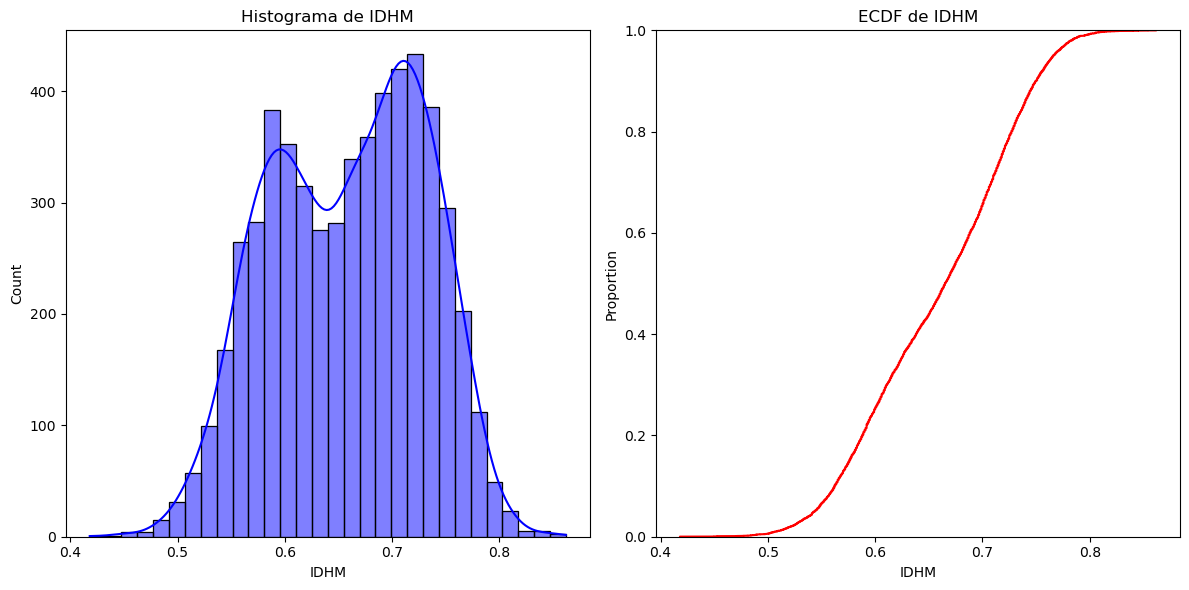

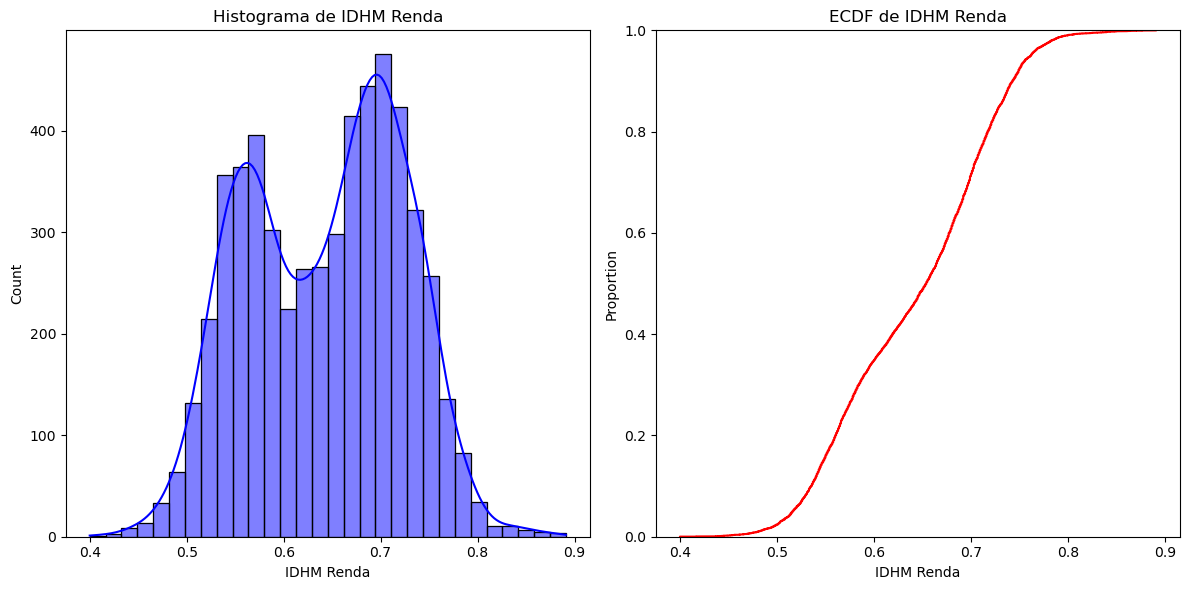

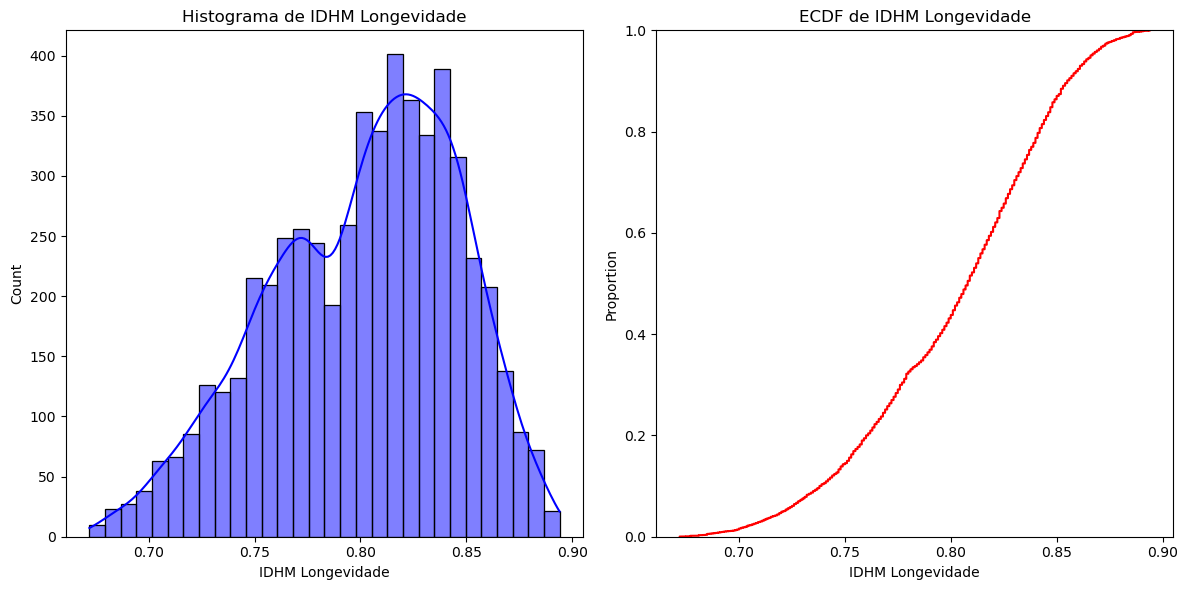

In [2]:

# Visualizar distribuições
for column in ['IDHM', 'IDHM Renda', 'IDHM Longevidade']:
    plt.figure(figsize=(12, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {column}')
    
    # ECDF
    plt.subplot(1, 2, 2)
    sns.ecdfplot(data[column], color='red')
    plt.title(f'ECDF de {column}')
    
    plt.tight_layout()
    plt.show()
    

## Modelo de Classificação

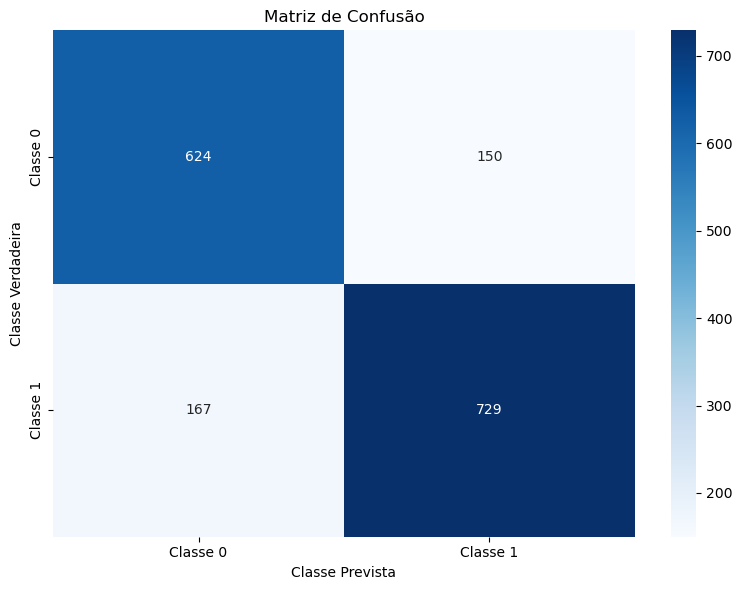

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       774
           1       0.83      0.81      0.82       896

    accuracy                           0.81      1670
   macro avg       0.81      0.81      0.81      1670
weighted avg       0.81      0.81      0.81      1670



In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Selecionar as variáveis preditoras e a variável alvo
X = data[['IDHM Renda', 'IDHM Longevidade']]
y = data['IDHM_Educacao_Binario']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

# Visualizar a matriz de confusão como imagem
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.tight_layout()
plt.show()

# Imprimir o relatório de classificação
print("Relatório de Classificação:")
print(classif_report)


## Testes de Hipótese Propostos


### Hipótese 1: Diferenças entre as médias de IDHM por estado de cada região (Norte, Nordeste, etc.)
**H₀**: As médias de IDHM  são iguais entre as regiões.
**H₁**: Pelo menos uma das médias de IDHM é diferente.


In [9]:
# Filtrar estados com pelo menos 3 observações
states = data['Estado'].value_counts()
valid_states = states[states >= 3].index

# Teste de normalidade somente para estados válidos
normality_by_state = {
    state: shapiro(data[data['Estado'] == state]['IDHM'])
    for state in valid_states
}
print("Teste de Normalidade por Estado (Shapiro-Wilk):")
for state, result in normality_by_state.items():
    print(f"{state}: Statistic={result.statistic}, p-value={result.pvalue}")



Teste de Normalidade por Estado (Shapiro-Wilk):
MG: Statistic=0.9975599050521851, p-value=0.2405468374490738
SP: Statistic=0.9970389008522034, p-value=0.29123276472091675
RS: Statistic=0.981186032295227, p-value=5.018070623918902e-06
BA: Statistic=0.9603627920150757, p-value=3.5949039300930963e-09
PR: Statistic=0.9780605435371399, p-value=9.628046427678782e-06
SC: Statistic=0.9941759705543518, p-value=0.3238967955112457
GO: Statistic=0.9861541986465454, p-value=0.017537128180265427
PI: Statistic=0.9644343852996826, p-value=2.1517398636206053e-05
PB: Statistic=0.9279837012290955, p-value=5.557920790266735e-09
MA: Statistic=0.9664965867996216, p-value=5.182091990718618e-05
PE: Statistic=0.951638400554657, p-value=6.110590675234562e-06
CE: Statistic=0.9544431567192078, p-value=1.1960661140619777e-05
RN: Statistic=0.9381507635116577, p-value=1.2404715334923822e-06
PA: Statistic=0.9944454431533813, p-value=0.8598305583000183
MT: Statistic=0.9844528436660767, p-value=0.11125484853982925
TO: 

## Interpretação dos Resultados do Teste de Normalidade por Estado (Shapiro-Wilk)

### Objetivo
O teste de Shapiro-Wilk foi aplicado para verificar a normalidade da distribuição do IDHM em cada estado.

### Resultados

1. **Estados com p-valor > 0.05 (Aceitam H₀, Normalidade)**:
   - **MG, SP, SC, PA, MT, RJ, AM, AC, AP**.
   - Para esses estados, não há evidências significativas para rejeitar a hipótese nula (\(H_0\)). Portanto, os dados do IDHM nesses estados seguem uma distribuição normal.

2. **Estados com p-valor ≤ 0.05 (Rejeitam H₀, Não Normalidade)**:
   - **RS, BA, PR, GO, PI, PB, MA, PE, CE, RN, TO, MS, ES, SE, RO, AL, RR**.
   - A hipótese de normalidade foi rejeitada nesses estados. Isso indica que os dados de IDHM nesses estados não seguem uma distribuição normal.

### Conclusão Geral
A maior parte dos estados (20 de 27) apresenta distribuições de IDHM **não normais**. Portanto, ao comparar as diferenças nas médias de IDHM entre estados, o uso de um teste **não paramétrico**, como o Kruskal-Wallis, é mais adequado, pois ele não exige a suposição de normalidade.



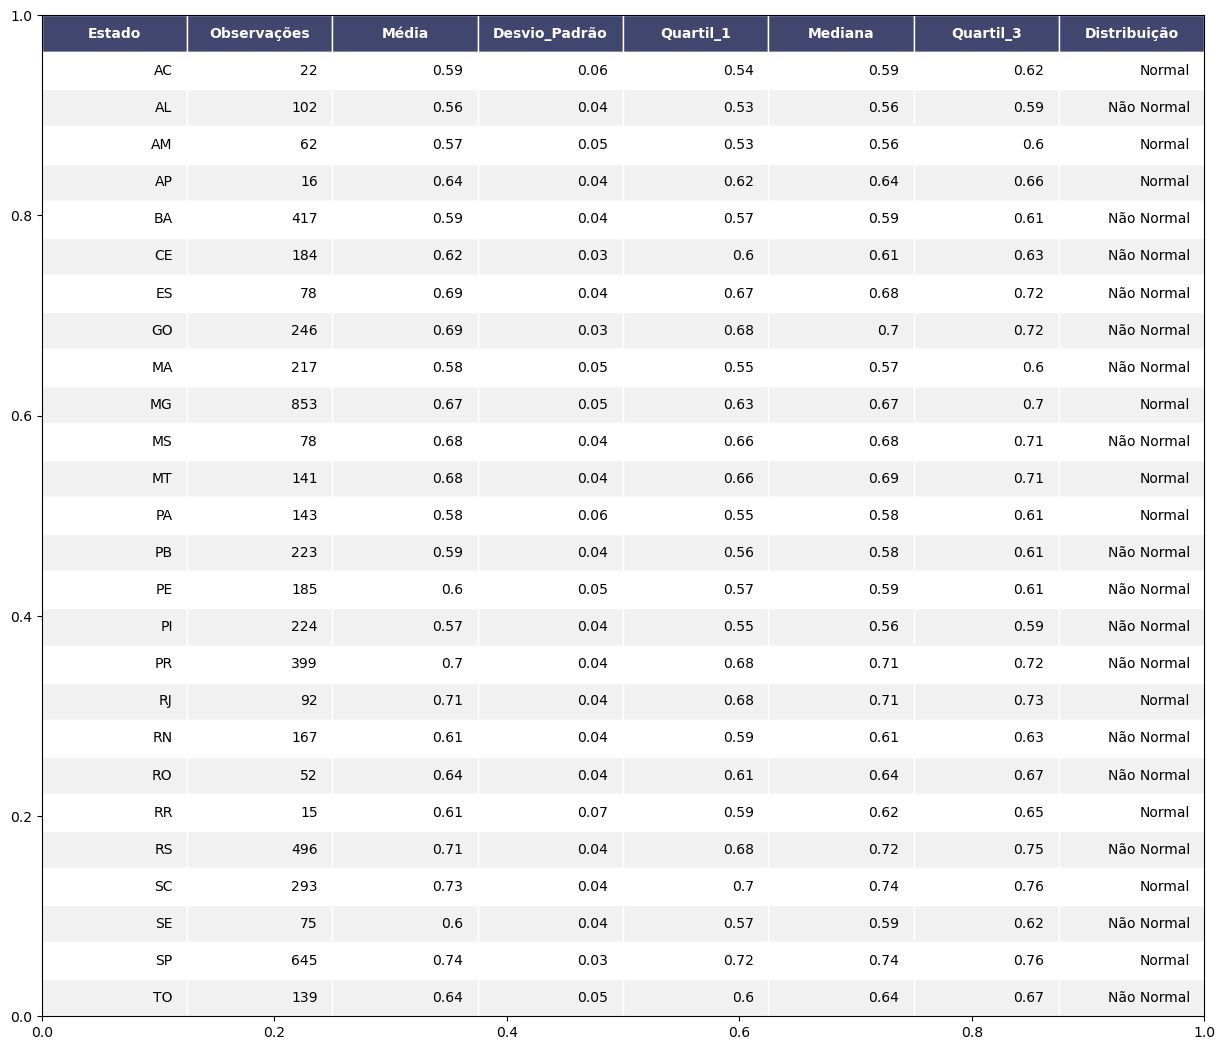

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Garantir que os valores na tabela estejam com 2 casas decimais
state_summary = state_summary.round(2)

# Função para renderizar a tabela como imagem
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
    return ax

# Gerar a tabela como imagem
fig, ax = plt.subplots(figsize=(15, len(state_summary) * 0.5))  # Ajustar tamanho
render_mpl_table(state_summary, header_columns=0, col_width=2.0, ax=ax)
plt.show()



## Explicação do Teste de Kruskal-Wallis

### O que o teste mede?
O teste de **Kruskal-Wallis** é uma técnica estatística não paramétrica que verifica se há diferenças significativas entre **distribuições** de dois ou mais grupos independentes. Ele é frequentemente utilizado quando os pressupostos de normalidade ou homogeneidade de variância necessários para a ANOVA não são atendidos.

Em termos práticos, o teste avalia se as distribuições ou medianas entre os grupos são iguais. Se o teste indicar diferenças significativas, isso sugere que pelo menos um dos grupos possui uma mediana diferente.

### Hipóteses do Teste:
- **\(H_0\) (Hipótese Nula)**: As distribuições (ou medianas) dos grupos são iguais.
- **\(H_1\) (Hipótese Alternativa)**: Pelo menos uma das distribuições (ou medianas) é diferente.

### Como o teste funciona?
1. **Transformação em Ranks**:
   - O teste de Kruskal-Wallis não analisa os valores brutos dos dados. Em vez disso, ele ordena (rank) todos os valores dos grupos combinados, atribuindo o menor valor ao rank 1, o segundo menor ao rank 2, e assim por diante.

2. **Cálculo da Soma dos Ranks**:
   - Para cada grupo, calcula-se a soma dos ranks atribuídos aos valores daquele grupo.

3. **Cálculo da Estatística do Teste**:
   - A estatística do teste é calculada com base nas somas dos ranks de cada grupo, no número de observações por grupo e no número total de observações.
   - A fórmula considera a diferença entre a soma dos ranks observada e a soma dos ranks esperada sob a hipótese nula.

4. **Distribuição Qui-Quadrado**:
   - A estatística de Kruskal-Wallis segue aproximadamente uma distribuição **Qui-Quadrado** (\( \chi^2 \)) com \(k - 1\) graus de liberdade, onde \(k\) é o número de grupos.

5. **Teste de Significância**:
   - Compara-se o valor calculado da estatística do teste ao valor crítico da distribuição Qui-Quadrado ou avalia-se o p-valor correspondente.
   - Se o p-valor for menor que o nível de significância (\(\alpha\)), rejeita-se a hipótese nula.

### Quando usar o Kruskal-Wallis?
- Quando os dados não seguem uma distribuição normal.
- Quando há evidências de variâncias heterogêneas entre os grupos.
- Quando os grupos são independentes.
- Para comparar dois ou mais grupos.

### Limitações:
- O teste indica **se existem diferenças**, mas não especifica **quais grupos diferem**. Para isso, testes post hoc (como Dunn ou Conover) devem ser aplicados.

### Conclusão:
O Kruskal-Wallis é uma alternativa robusta à ANOVA para comparar distribuições ou medianas entre grupos quando os pressupostos paramétricos não são atendidos. Ele é adequado para situações em que os dados são não normais ou os tamanhos dos grupos são desiguais, como na análise de IDHM entre estados brasileiros.


In [18]:
from scipy.stats import kruskal

# Filtrar estados com pelo menos 3 observações
states_with_enough_data = data['Estado'].value_counts()
valid_states = states_with_enough_data[states_with_enough_data >= 3].index

# Agrupar IDHM para estados válidos
grouped_idhm_valid = [data[data['Estado'] == state]['IDHM'] for state in valid_states]

# Garantir que há pelo menos dois grupos para realizar o teste
if len(grouped_idhm_valid) > 1:
    # Teste de Kruskal-Wallis ajustado
    kruskal_stat, kruskal_p = kruskal(*grouped_idhm_valid)
    print("Teste de Kruskal-Wallis:")
    print(f"Statistic={kruskal_stat}, p-value={kruskal_p}")
else:
    print("Não há estados suficientes com mais de 3 observações para realizar o teste Kruskal-Wallis.")


Teste de Kruskal-Wallis:
Statistic=3730.219562928479, p-value=0.0


## Interpretação do Resultado do Teste de Kruskal-Wallis

### Resultado do Teste
- **Estatística do teste (Kruskal-Wallis)**: 3730.22
- **p-valor**: 0.0

### Hipóteses do Teste
- **\(H_0\) (Hipótese Nula)**: As distribuições (ou medianas) do **IDHM** são iguais entre os estados.
- **\(H_1\) (Hipótese Alternativa)**: Pelo menos uma das distribuições (ou medianas) do **IDHM** é diferente entre os estados.

### Interpretação
O **p-valor** é **0.0**, o que é menor que qualquer nível de significância comum (\(\alpha = 0.05\)). Isso significa que rejeitamos a hipótese nula (\(H_0\)) e concluímos que:

- Existem diferenças estatisticamente significativas nas distribuições (ou medianas) do **IDHM** entre os estados brasileiros.

### O que isso indica?
1. A análise sugere que o **nível de desenvolvimento humano municipal (IDHM)** varia significativamente entre os estados.
2. Estados não possuem distribuições homogêneas de IDHM, refletindo disparidades regionais no Brasil.


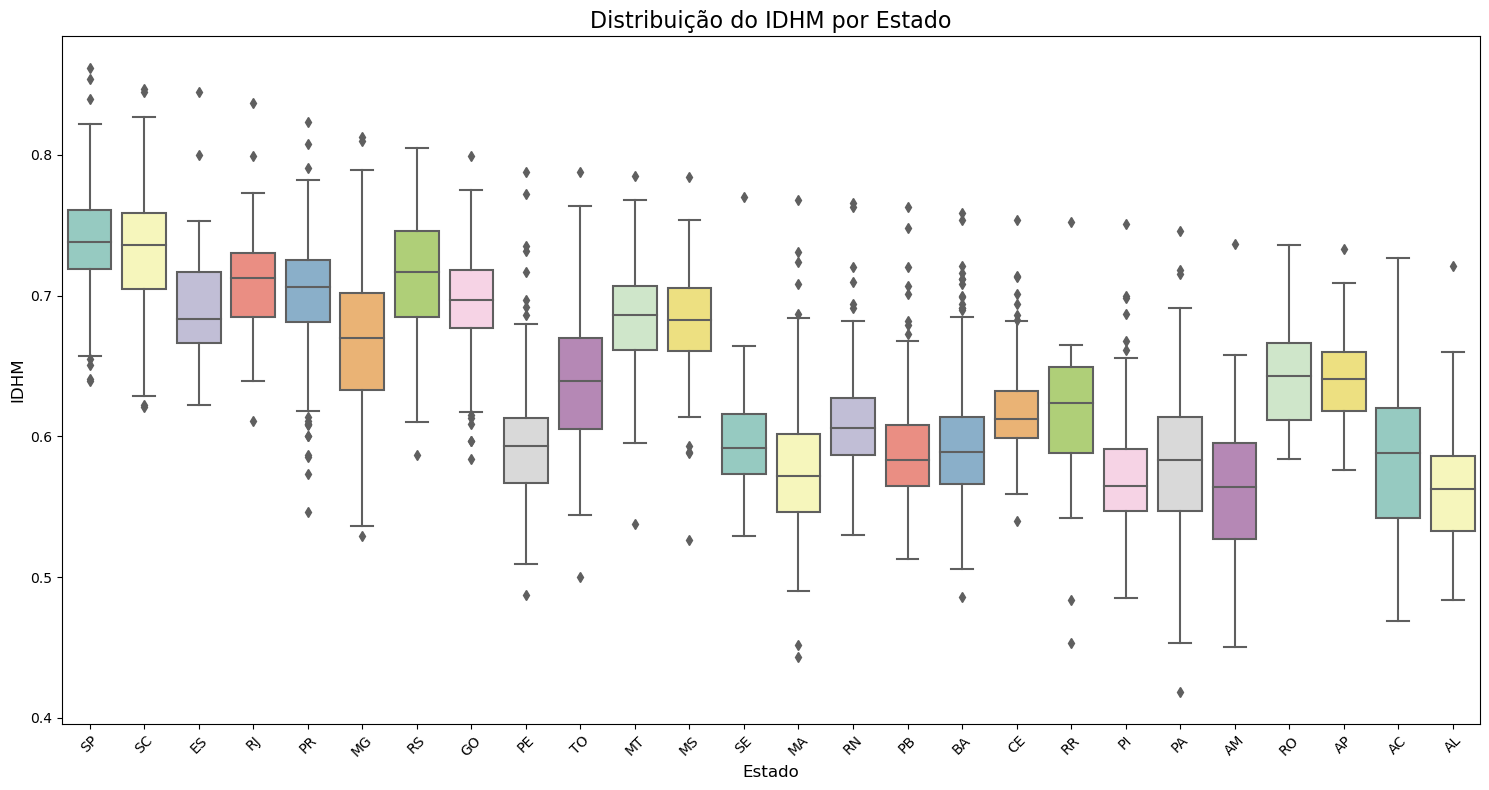

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar estados com pelo menos 3 observações
states_with_enough_data = data['Estado'].value_counts()
valid_states = states_with_enough_data[states_with_enough_data >= 3].index

# Filtrar os dados para estados válidos
filtered_data = data[data['Estado'].isin(valid_states)]

# Criar o boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Estado', y='IDHM', data=filtered_data, palette="Set3")
plt.title('Distribuição do IDHM por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('IDHM', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Análise Crítica dos Resultados do Boxplot

1. **Dispersão do IDHM por Estado**:
   - Observa-se que os estados apresentam uma variabilidade considerável nos valores de IDHM.
   - Estados como **São Paulo (SP)** e **Santa Catarina (SC)** possuem mediana elevada, indicando um nível de desenvolvimento humano mais consistente e elevado.
   - Por outro lado, estados como **Alagoas (AL)** e **Maranhão (MA)** apresentam valores de IDHM mais baixos, refletindo desigualdades regionais.

2. **Outliers**:
   - A presença de valores atípicos em quase todos os estados indica que há municípios com desempenhos extremos, tanto acima quanto abaixo do esperado.
   - Em estados como **Piauí (PI)** e **Bahia (BA)**, os outliers tendem a estar abaixo do limite inferior, indicando bolsões de desenvolvimento humano crítico.

3. **Amplitude Interquartil**:
   - Estados como **Minas Gerais (MG)** e **Rio Grande do Sul (RS)** possuem uma amplitude interquartil maior, indicando maior desigualdade no IDHM entre os municípios desses estados.
   - Já em estados como **São Paulo (SP)** e **Santa Catarina (SC)**, a amplitude é menor, sugerindo maior homogeneidade no desenvolvimento humano.

4. **Comparação Regional**:
   - Estados do Sudeste (SP, MG, RJ, ES) e Sul (RS, PR, SC) tendem a apresentar melhores distribuições, com medianas mais altas e menos dispersão.
   - Estados do Norte e Nordeste, como **Maranhão (MA)**, **Piauí (PI)** e **Alagoas (AL)**, destacam-se com medianas mais baixas, reforçando disparidades regionais no Brasil.

5. **Políticas Públicas**:
   - Os resultados indicam a necessidade de políticas públicas mais focadas nos estados com maior dispersão e medianas mais baixas, especialmente no Norte e Nordeste, para reduzir desigualdades e melhorar o IDHM em regiões mais críticas.

6. **Reforço para Análises Estatísticas**:
   - As distribuições observadas sugerem que o teste de Kruskal-Wallis, aplicado anteriormente, é adequado para identificar diferenças significativas entre os estados, visto que as variâncias e distribuições não seguem padrões homogêneos.



### Explicação dos Testes Post Hoc Utilizados

Após identificar diferenças significativas no **IDHM** entre os estados por meio do **Teste de Kruskal-Wallis**, foi necessário realizar testes post hoc para entender **quais estados diferem significativamente entre si**.

---

#### Por que realizar testes post hoc?
O teste de Kruskal-Wallis apenas identifica **se há diferenças significativas entre os grupos** (estados, no caso). No entanto, ele não indica **quais grupos apresentam essas diferenças**. Para identificar essas diferenças específicas, utilizamos testes post hoc.

---

#### Teste de Dunn
O teste de Dunn é uma técnica **não paramétrica** utilizada para realizar comparações múltiplas entre grupos. Ele é adequado porque:
1. **É compatível com o Kruskal-Wallis**:
   - Ambos os testes assumem que os dados não seguem necessariamente uma distribuição normal.
2. **Permite comparações múltiplas**:
   - Avalia diferenças entre todas as combinações possíveis de pares de estados.
3. **Controle de Erro Tipo I**:
   - Ajustes de \(p\)-valor, como o método de **Bonferroni**, são aplicados para evitar o aumento do erro Tipo I (falsos positivos) em múltiplas comparações.

---

#### Como o teste funciona?
1. **Ranks**:
   - Assim como o Kruskal-Wallis, o teste de Dunn trabalha com os ranks dos dados em vez dos valores brutos.
2. **Comparações par a par**:
   - Para cada par de estados, calcula-se a diferença nos ranks médios.
3. **Ajuste de p-valores**:
   - O método de Bonferroni foi utilizado para ajustar os p-valores, reduzindo o risco de conclusões falsas positivas.

---

#### Interpretação dos Resultados
- Para cada par de estados, o teste retorna um **p-valor ajustado**.
  - **\(p < 0.05\)**: Indica que há uma **diferença estatisticamente significativa** no IDHM entre os estados.
  - **\(p \geq 0.05\)**: Indica que **não há diferença significativa** entre os estados.

---

#### Conclusões
O teste de Dunn é essencial para complementar o Kruskal-Wallis em análises não paramétricas. Ele nos permite detalhar as diferenças específicas entre os estados e entender como eles se agrupam em termos de **nível de desenvolvimento humano (IDHM)**. A utilização de ajustes nos p-valores garante rigor estatístico e resultados confiáveis.


In [19]:
# Instalar a biblioteca, se necessário:
# pip install scikit-posthocs

from scikit_posthocs import posthoc_dunn
import pandas as pd

# Filtrar estados válidos com pelo menos 3 observações
states_with_enough_data = data['Estado'].value_counts()
valid_states = states_with_enough_data[states_with_enough_data >= 3].index

# Filtrar os dados para estados válidos
filtered_data = data[data['Estado'].isin(valid_states)]

# Aplicar o teste de Dunn para análise post hoc
posthoc_results = posthoc_dunn(
    filtered_data, 
    val_col='IDHM',  # Coluna de valores
    group_col='Estado',  # Coluna de grupos
    p_adjust='bonferroni'  # Ajuste para múltiplas comparações
)

# Interpretar e printar os resultados
alpha = 0.05
for i, state_1 in enumerate(posthoc_results.index):
    for j, state_2 in enumerate(posthoc_results.columns):
        if i < j:  # Evitar duplicados
            p_value = posthoc_results.loc[state_1, state_2]
            if p_value < alpha:
                print(f"Os estados {state_1} e {state_2} têm diferenças significativas no IDHM (p-value = {p_value:.4f}).")
            else:
                print(f"Os estados {state_1} e {state_2} não têm diferenças significativas no IDHM (p-value = {p_value:.4f}).")


Os estados AC e AL não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e AM não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e AP não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e BA não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e CE não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e ES têm diferenças significativas no IDHM (p-value = 0.0000).
Os estados AC e GO têm diferenças significativas no IDHM (p-value = 0.0000).
Os estados AC e MA não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e MG têm diferenças significativas no IDHM (p-value = 0.0004).
Os estados AC e MS têm diferenças significativas no IDHM (p-value = 0.0002).
Os estados AC e MT têm diferenças significativas no IDHM (p-value = 0.0000).
Os estados AC e PA não têm diferenças significativas no IDHM (p-value = 1.0000).
Os estados AC e PB não têm diferenças significat

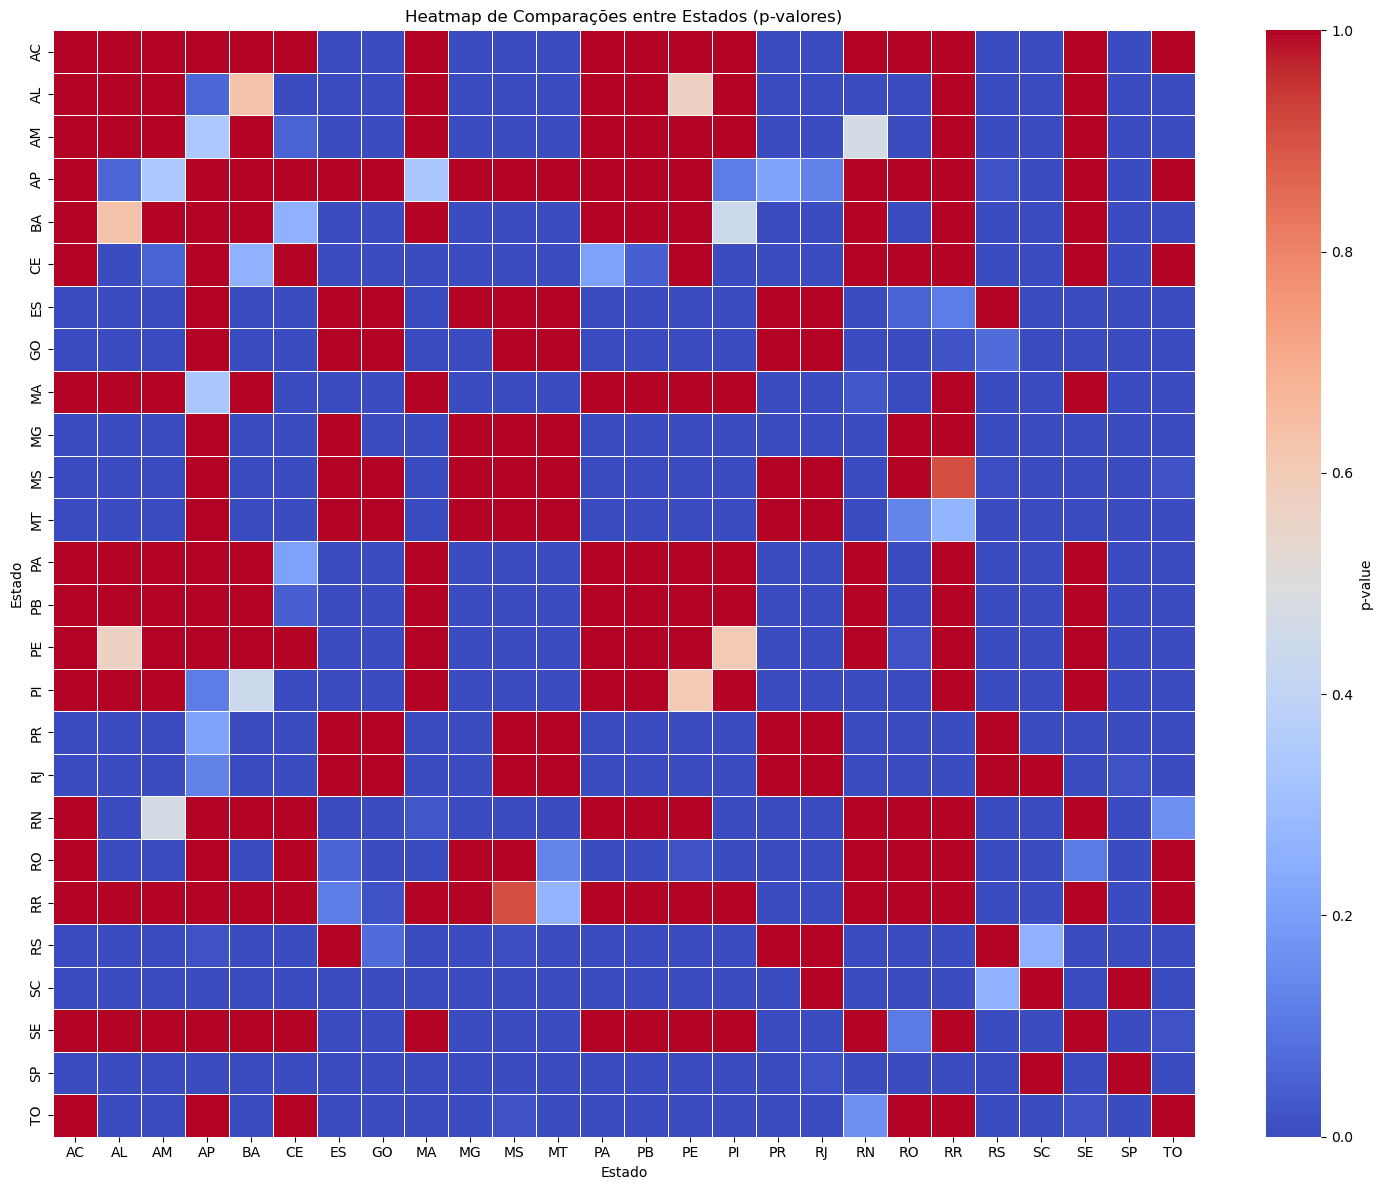

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar os resultados do post hoc em uma matriz de calor
heatmap_data = posthoc_results.values  # Matriz de p-valores
states = posthoc_results.index  # Nomes dos estados

# Configurar cores (verde para p >= 0.05, vermelho para p < 0.05)
colors = sns.color_palette("coolwarm", as_cmap=True)

# Plotar o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    heatmap_data, 
    xticklabels=states, 
    yticklabels=states, 
    cmap=colors, 
    cbar_kws={'label': 'p-value'}, 
    annot=False,  # Não exibir números
    linewidths=.5
)

# Ajustar títulos e rótulos
plt.title("Heatmap de Comparações entre Estados (p-valores)")
plt.xlabel("Estado")
plt.ylabel("Estado")
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Vamos ordernar por região para melhorar a visualização dos resultados

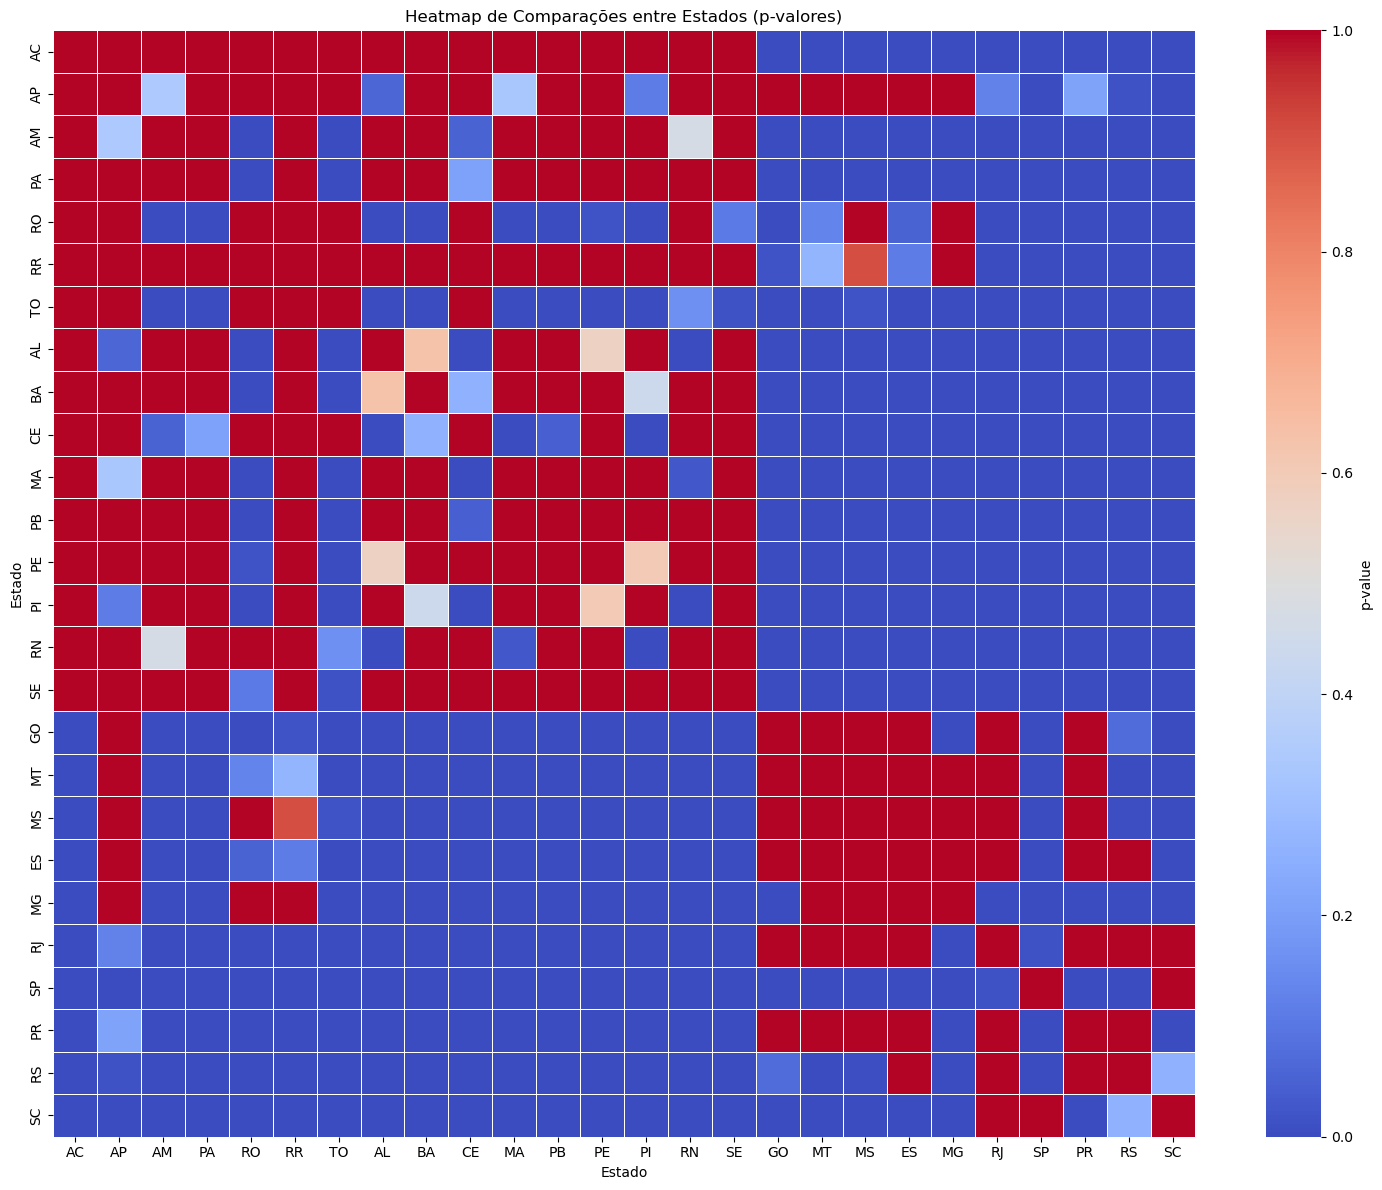

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir as regiões e a ordem dos estados
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Criar uma lista de estados ordenados por região
ordered_states = []
for regiao, estados in regioes.items():
    ordered_states.extend(estados)

# Filtrar os estados na matriz post hoc
filtered_states = [state for state in ordered_states if state in posthoc_results.index]

# Reordenar a matriz de p-valores
heatmap_data = posthoc_results.loc[filtered_states, filtered_states].values

# Plotar o heatmap com estados ordenados
plt.figure(figsize=(15, 12))
sns.heatmap(
    heatmap_data, 
    xticklabels=filtered_states, 
    yticklabels=filtered_states, 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    cbar_kws={'label': 'p-value'}, 
    annot=False,  # Não exibir números
    linewidths=.5
)

# Ajustar títulos e rótulos
plt.title("Heatmap de Comparações entre Estados (p-valores)")
plt.xlabel("Estado")
plt.ylabel("Estado")
plt.tight_layout()

# Mostrar o gráfico
plt.show()


### Interpretação do Heatmap de Comparações entre Estados

O heatmap exibe as comparações de \(p\)-valores entre os estados brasileiros, organizados por regiões. A coloração das células indica se há diferenças significativas entre os estados no IDHM:

---

#### **Cores do Heatmap**:
- **Azul escuro (p-valor próximo de 0)**:
  - Indica diferenças estatisticamente significativas (\(p < 0.05\)) entre os estados.
- **Vermelho claro ou branco (p-valor próximo de 1)**:
  - Indica que não há diferenças significativas (\(p \geq 0.05\)) entre os estados.

---

#### **Análise por Região**:
1. **Norte**:
   - Estados da região Norte (AC, AP, AM, PA, RO, RR, TO) geralmente **não apresentam diferenças significativas entre si**, indicando maior homogeneidade interna no IDHM.
   - Comparações com estados de outras regiões, especialmente do **Sudeste e Sul**, mostram **diferenças significativas** (azul escuro).

2. **Nordeste**:
   - A região Nordeste apresenta **maior variação interna**, com estados como **BA, CE, PE e PI** mostrando diferenças significativas em relação a outros estados da mesma região e de outras regiões.
   - Apesar disso, há semelhanças entre estados mais próximos.

3. **Centro-Oeste**:
   - Estados como **MT e MS** têm algumas semelhanças internas e com estados do Sudeste, mas mostram **diferenças significativas** em relação aos estados do Norte e Nordeste.

4. **Sudeste e Sul**:
   - Estados dessas regiões (SP, RJ, PR, RS, SC) frequentemente apresentam **diferenças significativas** em relação ao Norte e Nordeste, indicando um maior desenvolvimento humano.
   - Dentro dessas regiões (Sudeste e Sul), há **maior similaridade**, com poucas diferenças significativas.

---

#### **Disparidades Regionais**:
- **Inter-regionais**:
  - Estados do **Sudeste e Sul** frequentemente diferem significativamente dos estados do **Norte e Nordeste**, reforçando as disparidades regionais no Brasil.
- **Intra-regionais**:
  - O Norte é mais homogêneo, com menos diferenças significativas entre seus estados.
  - O Nordeste é mais heterogêneo, com diferenças significativas entre alguns estados.

---

#### **Conclusões**:
1. **Disparidades entre Regiões**:
   - As regiões **Sudeste** e **Sul** apresentam os maiores IDHMs e diferem significativamente do **Norte** e do **Nordeste**, que têm IDHMs mais baixos.

2. **Semelhanças Internas**:
   - Regiões como o **Norte** apresentam maior homogeneidade interna, enquanto o **Nordeste** apresenta maior variação.


